TRAVEL INSURANCE

SUBMITTED BY: KHAYATI CHADHA
ROLL NO: 015033
COURSE: FUNCTIONAL ANALYTICS

A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.
Image Credits-Unsplash(free to use)

Content
Age- Age Of The Customer
Employment Type- The Sector In Which Customer Is Employed
GraduateOrNot- Whether The Customer Is College Graduate Or Not
AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
FamilyMembers- Number Of Members In Customer's Family
ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
#Display multiple outputs from a Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
##Listing the path and reading the dataframee
path = os.chdir("/gdrive/MyDrive/Functional Analytics/")
data_df = pd.read_csv('TravelInsurancePrediction.csv', encoding='latin')
data_df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


**DATA VISUALISATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


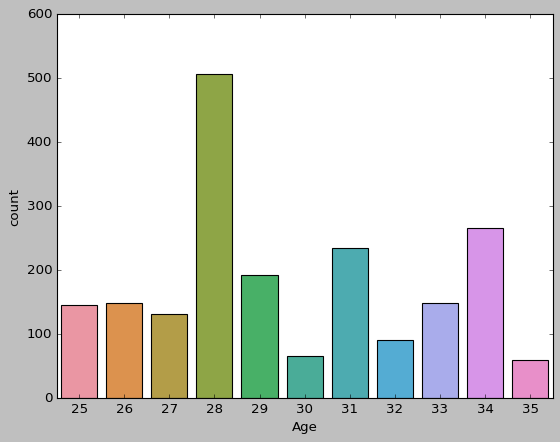

In [40]:
#plotting the countplot for age column
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["Age"]);

The maximum number of travelers are of 28 years and else there are almost equal number of travelers 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


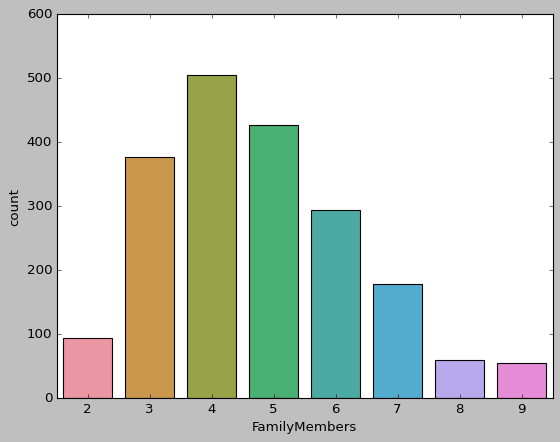

In [41]:
#plotting the number of family members of different travelers
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["FamilyMembers"]);

Maximum number of travelers have four family members 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Annual Income Distribution [ μ: 932762.96 ]')

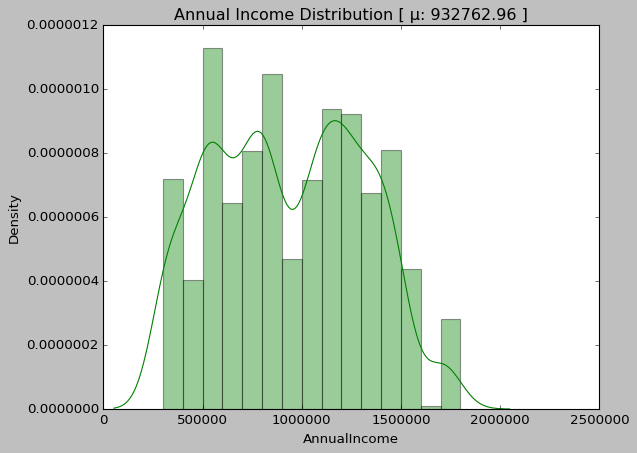

In [42]:
#plotting the annual income distribution of travelers
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["AnnualIncome"], color="g")
plt.title(f"Annual Income Distribution [ \u03BC: {df['AnnualIncome'].mean():.2f} ]")
plt.show()

([<matplotlib.patches.Wedge at 0x7f523e188d90>,
 [Text(-0.7069923298370439, 0.8427110095113204, 'Non-Chronic'),
  Text(0.7712643598222295, -0.9193211012850769, 'Chronic')])

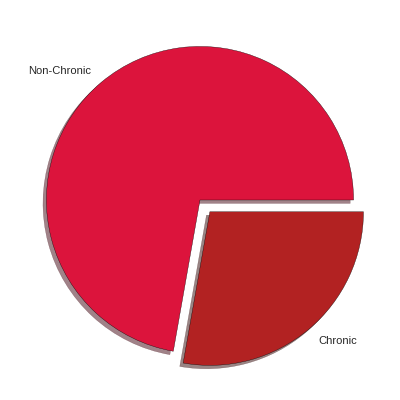

In [43]:
#plotting the pie chart for understanding whether travelers suffer from illness or not
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["ChronicDiseases"].value_counts(), 
        colors=["crimson","firebrick"], 
        labels=["Non-Chronic","Chronic"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

Maximum number of travelers did not have any chronic illness

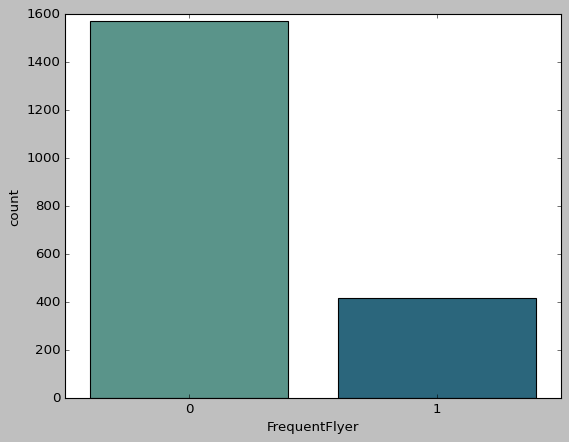

In [44]:
#plotting countplot to understand whether travelers travel frequently or not
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df["FrequentFlyer"], palette="crest");

([<matplotlib.patches.Wedge at 0x7f523e0d41d0>,
 [Text(-0.907367169680644, 0.6218398663528559, 'Non Abroad Travellers'),
  Text(0.9898551577107164, -0.6783706706170994, 'Abroad Travellers')])

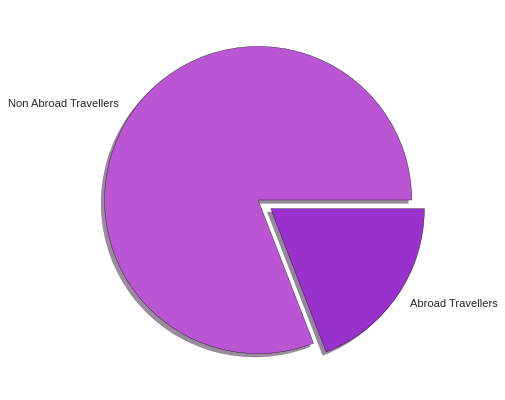

In [45]:
#plotting pie chart to understand whether travelers have travelled abroad or not
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["EverTravelledAbroad"].value_counts(), 
        colors=["mediumorchid","darkorchid"], 
        labels=["Non Abroad Travellers","Abroad Travellers"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

Most travellers have not travelled abroad

([<matplotlib.patches.Wedge at 0x7f523e024110>,
 [Text(-0.4767124851336916, 0.9913350626895329, "Don't have Travel Insurance"),
  Text(0.5070488329095786, -1.054419973750988, 'Have Travel Insurance')])

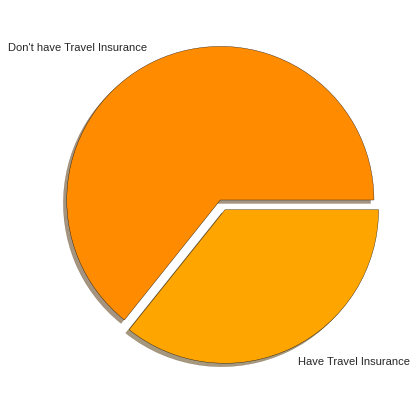

In [46]:
#Plotting pie chart to understand the distribution of travelrs having insurance or not
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["TravelInsurance"].value_counts(), 
        colors=["darkorange","orange"], 
        labels=["Don't have Travel Insurance","Have Travel Insurance"], 
        shadow = True, 
        explode = (0, 0.07)
        )
plt.show()

It is clearly observable from the above figure that approx 36% of people have bought the travel insurance whereas only 64% of people have not bought the insurance.



In [5]:
#to obtain all numeric columns
numeric = [col for col in data_df.columns if data_df[col].dtypes!='object']
print('numeric columns are:',numeric)
#to obtain all categorical columns
categorical = [col for col in data_df.columns if data_df[col].dtypes=='object']
print('categorical columns are:',categorical)

numeric columns are: ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']
categorical columns are: ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']


In [6]:
cat_df =data_df[categorical]
numeric_df= data_df[numeric]

In [7]:
#viewing the head of categorical dataframe
cat_df.head()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No


In [8]:
#viewing the head of numerical dataframe
numeric_df.head()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
0,0,31,400000,6,1,0
1,1,31,1250000,7,0,0
2,2,34,500000,4,1,1
3,3,28,700000,3,1,0
4,4,28,700000,8,1,0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label encoding the categorical columns
cat_df['Employment Type'] = le.fit_transform(cat_df['Employment Type'])
cat_df['FrequentFlyer'] = le.fit_transform(cat_df['FrequentFlyer'])
cat_df['EverTravelledAbroad'] = le.fit_transform(cat_df['EverTravelledAbroad'])
cat_df['GraduateOrNot'] = le.fit_transform(cat_df['GraduateOrNot'])

cat_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,0,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,1,0
5,1,0,0,0
6,0,1,0,0
7,1,1,1,1
8,1,1,1,1
9,0,1,1,0


In [10]:
import pandas as pd
#concatenating the label encoded and standard scaled dataframes
df = pd.concat([cat_df,numeric_df],axis=1)

In [11]:
df.head()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
0,0,1,0,0,0,31,400000,6,1,0
1,1,1,0,0,1,31,1250000,7,0,0
2,1,1,0,0,2,34,500000,4,1,1
3,1,1,0,0,3,28,700000,3,1,0
4,1,1,1,0,4,28,700000,8,1,0


In [12]:
#separating the target column from other columns
ds= df.iloc[:,:-1]
y= df.iloc[:,[-1]]

In [13]:
#viewing the non-target columns
ds

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases
0,0,1,0,0,0,31,400000,6,1
1,1,1,0,0,1,31,1250000,7,0
2,1,1,0,0,2,34,500000,4,1
3,1,1,0,0,3,28,700000,3,1
4,1,1,1,0,4,28,700000,8,1
...,...,...,...,...,...,...,...,...,...
1982,1,1,1,1,1982,33,1500000,4,0
1983,1,1,0,1,1983,28,1750000,5,1
1984,1,1,0,0,1984,28,1150000,6,1
1985,1,1,1,1,1985,34,1000000,6,0


In [14]:
#viewing the target column
y

,TravelInsurance
0,0
1,0
2,1
3,0
4,0
...,...
1982,1
1983,0
1984,0
1985,1


In [15]:
ss = StandardScaler()
x = ss.fit_transform(ds.iloc[:,5:])

In [16]:
#splitting dataset into training and test 
X_train,X_test, y_train,y_test = train_test_split(
                                                  x,
                                                  y,
                                                  test_size = 0.25
                                                  )
X_train.shape  
X_test.shape  

(1490, 4)

(497, 4)

In [17]:
no_of_samples_tr = X_train.shape[0]
input_features = X_train.shape[1]               
channels = 1
batch_size_tr = no_of_samples_tr    

In [18]:
no_of_samples_test = X_test.shape[0]          
input_features = X_test.shape[1]             
channels = 1
batch_size_test = no_of_samples_test

In [19]:
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [20]:
train.shape  
test.shape 

(1490, 4, 1)

(497, 4, 1)

In [21]:
#creating the input layer
inputs = tf.keras.Input(
                         shape = (train.shape[1],train.shape[2])  
                        )

In [22]:
import tensorflow as tf
from tensorflow.keras import layers
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

In [23]:
x_left = layers.Conv1D(
                       filters = 128,
                       kernel_size=2,
                       activation='relu'
                       )(x_left)

In [27]:
x_rt = layers.Conv1D(
                      filters = 32,
                      kernel_size=3,
                      activation='relu'
                    )(inputs)

In [28]:
x_rt = layers.Conv1D(
                      filters = 64,
                      kernel_size=2,
                      activation='relu'
                    )(x_rt)

In [29]:
x = tf.keras.layers.concatenate([x_left,x_rt])

In [30]:
x = layers.Flatten()(x)

In [31]:
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [32]:
out = layers.Dense(1,activation = 'sigmoid')(x)

In [33]:
model = Model(inputs = [inputs], outputs = [out])

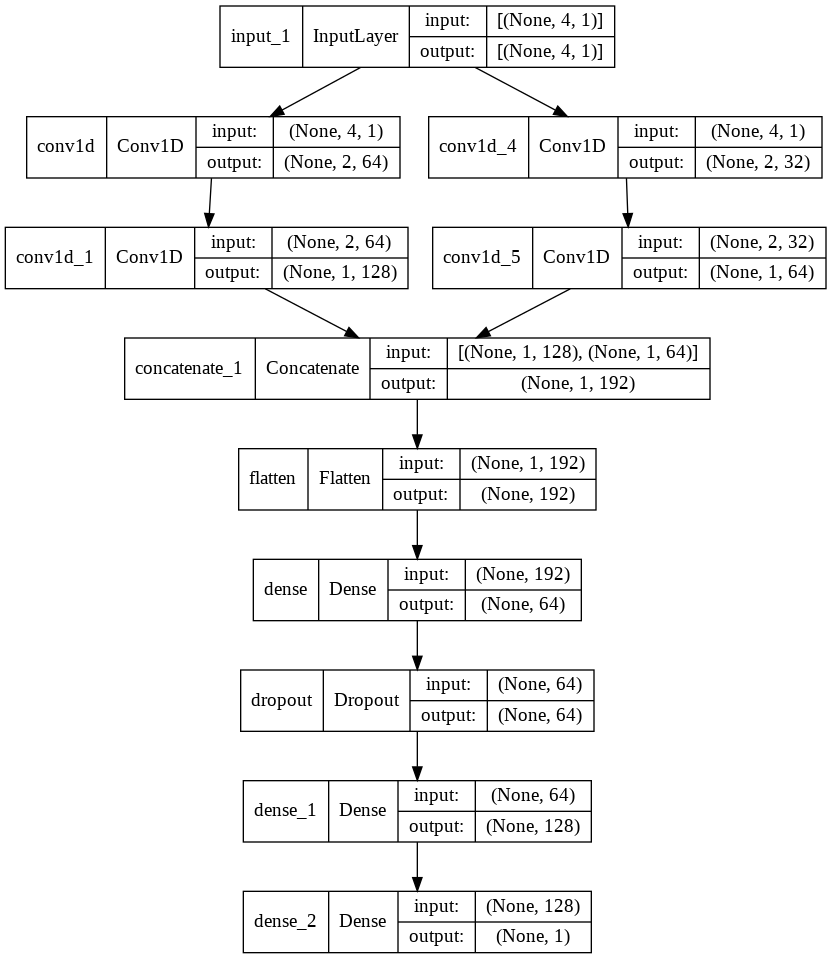

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes= True)

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 1)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2, 64)        256         ['input_1[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 2, 32)        128         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 1, 128)       16512       ['conv1d[0][0]']                 
                                                                                              

In [36]:
model.compile(
               optimizer = 'adam',
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics = ['accuracy']
               )

In [37]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)

In [38]:
history = model.fit(
                    train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
47/47 [==============================] - 1s 3ms/step - loss: 0.6036 - accuracy: 0.6973
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.7570
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7866
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.8007
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.8087
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.8094
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.8121
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.8195
Epoch 9/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.8161
Epoch 10/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8168
Epoch 11/50
47/47 [

In [39]:
model.evaluate(test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8189


[0.48280245065689087, 0.818913459777832]